In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [40]:
c=pd.read_excel('/content/Sample - Superstore.xls')
c

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [41]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [42]:
c.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [43]:
c.duplicated().sum()

0

RECENCY

In [44]:
current_date=c['Order Date'].max()
recency_data=c.groupby('Order ID')['Order Date'].max().reset_index()
print(recency_data.head())
recency_data['Recency']=(current_date-recency_data['Order Date']).dt.days
print(recency_data[['Order ID','Recency']].head(10))

         Order ID Order Date
0  CA-2014-100006 2014-09-07
1  CA-2014-100090 2014-07-08
2  CA-2014-100293 2014-03-14
3  CA-2014-100328 2014-01-28
4  CA-2014-100363 2014-04-08
         Order ID  Recency
0  CA-2014-100006     1210
1  CA-2014-100090     1271
2  CA-2014-100293     1387
3  CA-2014-100328     1432
4  CA-2014-100363     1362
5  CA-2014-100391     1315
6  CA-2014-100678     1352
7  CA-2014-100706     1110
8  CA-2014-100762     1132
9  CA-2014-100860     1375


FREQUENCY

In [45]:
frequency_data=c.groupby('Order ID')['Order Date'].nunique().reset_index()
frequency_data.columns=['Order ID','Frequency']
print(frequency_data)

            Order ID  Frequency
0     CA-2014-100006          1
1     CA-2014-100090          1
2     CA-2014-100293          1
3     CA-2014-100328          1
4     CA-2014-100363          1
...              ...        ...
5004  US-2017-168802          1
5005  US-2017-169320          1
5006  US-2017-169488          1
5007  US-2017-169502          1
5008  US-2017-169551          1

[5009 rows x 2 columns]


MONETARY VALUE

In [46]:
c['totalprice']=c['Sales']
monetary_data=c.groupby('Order ID')['totalprice'].sum().reset_index()
monetary_data.columns=['Order ID','MonetaryValue']
print(monetary_data)

            Order ID  MonetaryValue
0     CA-2014-100006        377.970
1     CA-2014-100090        699.192
2     CA-2014-100293         91.056
3     CA-2014-100328          3.928
4     CA-2014-100363         21.376
...              ...            ...
5004  US-2017-168802         18.368
5005  US-2017-169320        171.430
5006  US-2017-169488         56.860
5007  US-2017-169502        113.410
5008  US-2017-169551       1344.838

[5009 rows x 2 columns]


In [47]:
rfm_data=pd.merge(recency_data,frequency_data)
rfm_data=pd.merge(rfm_data,monetary_data,on='Order ID')
print(rfm_data)

            Order ID Order Date  Recency  Frequency  MonetaryValue
0     CA-2014-100006 2014-09-07     1210          1        377.970
1     CA-2014-100090 2014-07-08     1271          1        699.192
2     CA-2014-100293 2014-03-14     1387          1         91.056
3     CA-2014-100328 2014-01-28     1432          1          3.928
4     CA-2014-100363 2014-04-08     1362          1         21.376
...              ...        ...      ...        ...            ...
5004  US-2017-168802 2017-11-03       57          1         18.368
5005  US-2017-169320 2017-07-23      160          1        171.430
5006  US-2017-169488 2017-09-07      114          1         56.860
5007  US-2017-169502 2017-08-28      124          1        113.410
5008  US-2017-169551 2017-07-07      176          1       1344.838

[5009 rows x 5 columns]


In [48]:
rfm_data.drop(['Order Date','Order ID'], axis=1, inplace=True)

In [49]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        5009 non-null   int64  
 1   Frequency      5009 non-null   int64  
 2   MonetaryValue  5009 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 117.5 KB


In [50]:
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=15)
  kmeans.fit(rfm_data)
  wcss.append(kmeans.inertia_)

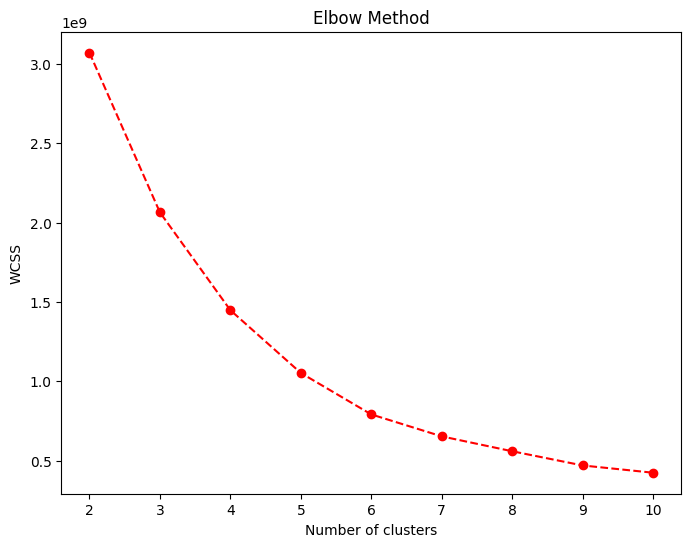

In [51]:
plt.figure(figsize=(8,6))
plt.plot(range(2,11),wcss,marker='o',linestyle='--',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
#applying KMeans cluster with k=
kmeans=KMeans(n_clusters=4,random_state=2)
kmeans.fit(rfm_data)
rfm_data['Cluster']=kmeans.labels_
rfm_data

,Recency,Frequency,MonetaryValue,Cluster
0,1210,1,377.970,1
1,1271,1,699.192,1
2,1387,1,91.056,1
3,1432,1,3.928,1
4,1362,1,21.376,1
...,...,...,...,...
5004,57,1,18.368,1
5005,160,1,171.430,1
5006,114,1,56.860,1
5007,124,1,113.410,1


In [53]:
for i in range(4):
  cluster_df=rfm_data[rfm_data['Cluster']==i]
  print(f"Cluster{i}:\n{cluster_df}\n")

Cluster0:
      Recency  Frequency  MonetaryValue  Cluster
27       1159          1       1252.602        0
30       1135          1        865.500        0
35       1155          1       1044.440        0
40       1106          1       1107.660        0
43       1330          1       1769.784        0
...       ...        ...            ...      ...
4993      254          1        979.626        0
4996      224          1       1196.316        0
4997      157          1       2012.302        0
5000       21          1       1827.510        0
5008      176          1       1344.838        0

[685 rows x 4 columns]

Cluster1:
      Recency  Frequency  MonetaryValue  Cluster
0        1210          1        377.970        1
1        1271          1        699.192        1
2        1387          1         91.056        1
3        1432          1          3.928        1
4        1362          1         21.376        1
...       ...        ...            ...      ...
5003      357          1

In [54]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(rfm_data,kmeans.labels_)
print('average silhoutte score:',silhouette_avg)

average silhoutte score: 0.5350055028366376


In [55]:
cluster_counts = rfm_data['Cluster'].value_counts()
cluster_counts

,count
Cluster,
1,4226
0,685
2,94
3,4


Text(0.5, 1.0, 'Cluster Distribution')

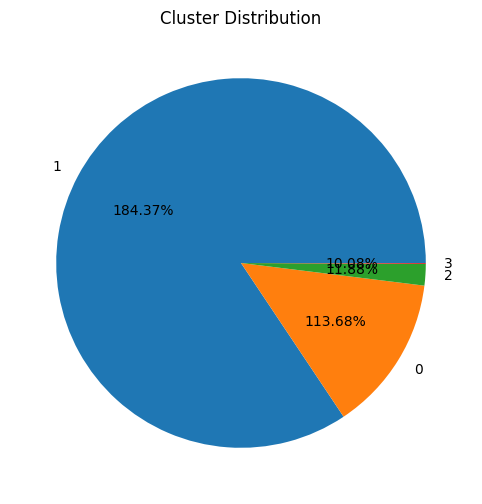

In [56]:
plt.figure(figsize=(8,6))
plt.pie(cluster_counts,labels=cluster_counts.index,autopct='1%.2f%%')
plt.title('Cluster Distribution')

In [57]:
rfm_data['r_rank']=rfm_data['Recency'].rank(ascending=False)#give higher rank to the customer with lower recently
rfm_data['f_rank']=rfm_data['Frequency'].rank(ascending=True)#here lower the frequency lower the rank
rfm_data['m_rank']=rfm_data['MonetaryValue'].rank(ascending=True)
rfm_data

,Recency,Frequency,MonetaryValue,Cluster,r_rank,f_rank,m_rank
0,1210,1,377.970,1,488.0,2505.0,3435.5
1,1271,1,699.192,1,346.5,2505.0,4073.0
2,1387,1,91.056,1,87.0,2505.0,2018.0
3,1432,1,3.928,1,30.0,2505.0,92.0
4,1362,1,21.376,1,157.0,2505.0,852.5
...,...,...,...,...,...,...,...
5004,57,1,18.368,1,4546.5,2505.0,740.0
5005,160,1,171.430,1,4009.5,2505.0,2622.0
5006,114,1,56.860,1,4205.0,2505.0,1598.0
5007,124,1,113.410,1,4139.0,2505.0,2222.0


In [58]:
rfm_data['r_rank_norm']=(rfm_data['r_rank']/rfm_data['r_rank'].max())*100
rfm_data['f_rank_norm']=(rfm_data['f_rank']/rfm_data['f_rank'].max())*100
rfm_data['m_rank_norm']=(rfm_data['m_rank']/rfm_data['m_rank'].max())*100
rfm_data

,Recency,Frequency,MonetaryValue,Cluster,r_rank,f_rank,m_rank,r_rank_norm,f_rank_norm,m_rank_norm
0,1210,1,377.970,1,488.0,2505.0,3435.5,9.745382,100.0,68.586544
1,1271,1,699.192,1,346.5,2505.0,4073.0,6.919621,100.0,81.313635
2,1387,1,91.056,1,87.0,2505.0,2018.0,1.737394,100.0,40.287483
3,1432,1,3.928,1,30.0,2505.0,92.0,0.599101,100.0,1.836694
4,1362,1,21.376,1,157.0,2505.0,852.5,3.135297,100.0,17.019365
...,...,...,...,...,...,...,...,...,...,...
5004,57,1,18.368,1,4546.5,2505.0,740.0,90.793809,100.0,14.773408
5005,160,1,171.430,1,4009.5,2505.0,2622.0,80.069895,100.0,52.345778
5006,114,1,56.860,1,4205.0,2505.0,1598.0,83.974039,100.0,31.902575
5007,124,1,113.410,1,4139.0,2505.0,2222.0,82.656016,100.0,44.360152


In [59]:
rfm_data.drop(['r_rank','f_rank','m_rank'],axis=1,inplace=True)

In [61]:
rfm_data['rfm_score']=0.33*rfm_data['r_rank_norm']+0.33*rfm_data['f_rank_norm']+0.33*rfm_data['m_rank_norm']
rfm_data[['rfm_score']]

,rfm_score
0,58.849536
1,62.116974
2,46.868209
3,33.803812
4,39.651039
...,...
5004,67.837182
5005,76.697172
5006,71.239283
5007,74.915335


In [63]:
rfm_data["Customer_segment"] = np.where(rfm_data['rfm_score'] > 45 ,"Top Customers",
                               (np.where(rfm_data['rfm_score'] > 40,"High value Customer",
                               (np.where(rfm_data['rfm_score'] > 30, "Medium Value Customer",
                                np.where(rfm_data['rfm_score'] > 1.5,'Low Value Customers', 'Lost Customers'))))))
rfm_data[[ 'rfm_score', 'Customer_segment']].head(20)

,rfm_score,Customer_segment
0,58.849536,Top Customers
1,62.116974,Top Customers
2,46.868209,Top Customers
3,33.803812,Medium Value Customer
4,39.651039,Medium Value Customer
5,38.468652,Medium Value Customer
6,60.917587,Top Customers
7,54.409929,Top Customers
8,62.964438,Top Customers
9,38.705557,Medium Value Customer


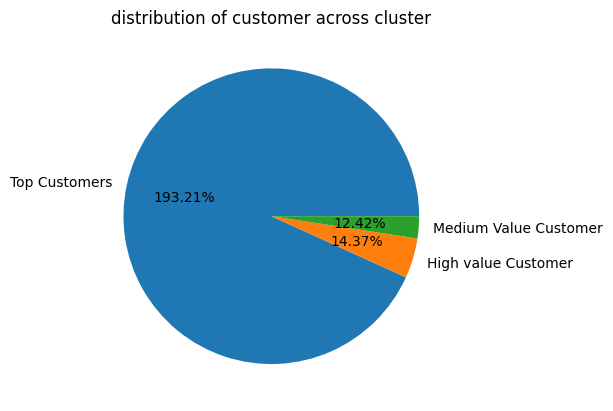

In [64]:
plt.pie(rfm_data['Customer_segment'].value_counts(),labels=rfm_data['Customer_segment'].value_counts().index,autopct='1%.2f%%')
plt.title('distribution of customer across cluster')
plt.show()